In [7]:
# Imports
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from icecream import ic

# custom Imports
from evaluate import evaluate_model, confusion_matrix_heatmap
from predata import target_train_tfidf, target_test_tfidf, test_train, test_test, target_train, target_test

In [8]:
########## Pipeline and Params

pipe = Pipeline(
    [
        ("smote", SMOTE(random_state=0)),
        ("log", LogisticRegression(random_state=0, max_iter=1000)),
    ]
)
parameters = {
    "log__C": [30],
    "log__penalty": ["l2"],
    "log__solver": ["saga"],
    "log__multi_class": ["auto"],
}

In [9]:
########### Searching Via GridSearchCV with Pipeline
log_classifier = GridSearchCV(pipe, parameters, cv=3, n_jobs= -1)
log_classifier.fit(target_train_tfidf, test_train)
ic(log_classifier.best_estimator_)

ic| log_classifier.best_estimator_: Pipeline(steps=[('smote', SMOTE(random_state=0)),
                                                    ('log',
                                                     LogisticRegression(C=30, max_iter=1000, random_state=0,
                                                                        solver='saga'))])


Pipeline(steps=[('smote', SMOTE(random_state=0)),
                ('log',
                 LogisticRegression(C=30, max_iter=1000, random_state=0,
                                    solver='saga'))])

In [10]:
# EVALUATING THIS CLASSIFIER
evaluate_model(
    target_train_tfidf, test_train, target_test_tfidf, test_test, log_classifier
)

ic| scorings: array([0.34412955, 0.33711507, 0.34116694])
ic| model_score: 0.3287449392712551
ic| accuracy: 0.3287449392712551
ic| confusion: array([[ 96, 133,  96],
                      [163, 214, 169],
                      [113, 155,  96]])


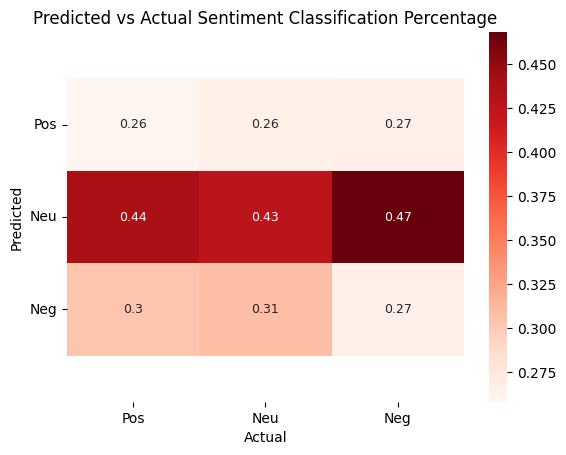

In [11]:
confusion_matrix_heatmap(log_classifier, target_test_tfidf, test_test)